# A/B тестирование. Проверка гипотез

**Цель исследования: приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты**

## <a name="contents">Задачи исследования:</a>
## [1. Приоритизация гипотез](#stage_a)
---
В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.

---
* Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета;
* Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета;
* Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.
## [2. Анализ A/B-теста](#stage_b)
---
Вы провели A/B-тест и получили результаты, которые описаны в файлах orders.csv и visitors.csv.

---
### [1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.](#stage_1)
### [2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.](#stage_2)
### [3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.](#stage_3)
### [4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.](#stage_4)
### [5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.](#stage_5)
### [6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.](#stage_6)
### [7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.](#stage_7)
### [8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.](#stage_8)
### [9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.](#stage_9)
### [10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.](#stage_10)
### [11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.](#stage_11)
### [12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.](#stage_12)
### [13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.](#stage_13)
### [14. Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.](#stage_14)

<a name="stage_a"></a>
# Шаг 1. Приоритезация гипотез

[Вернуться к оглавлению](#contents)

In [2]:
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mt
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
hypothesis = pd.read_csv(r'C:\Users\Max_Berdnikov\Desktop\data\hypothesis.csv')

In [5]:
# Про
pd.set_option('display.max_colwidth', None)

In [6]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [7]:
hypothesis['ice_score'] = hypothesis['Impact'] * hypothesis['Confidence'] * hypothesis['Efforts']

In [13]:
hypothesis.sort_values('ice_score', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ice_score,rice_score
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,480,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,405,16.2
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,280,112.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,200,4.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,72,9.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,72,40.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,63,56.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,12,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1,3.0


Text(0.5, 1.0, 'Приоритизация проверки гипотез по ICE')

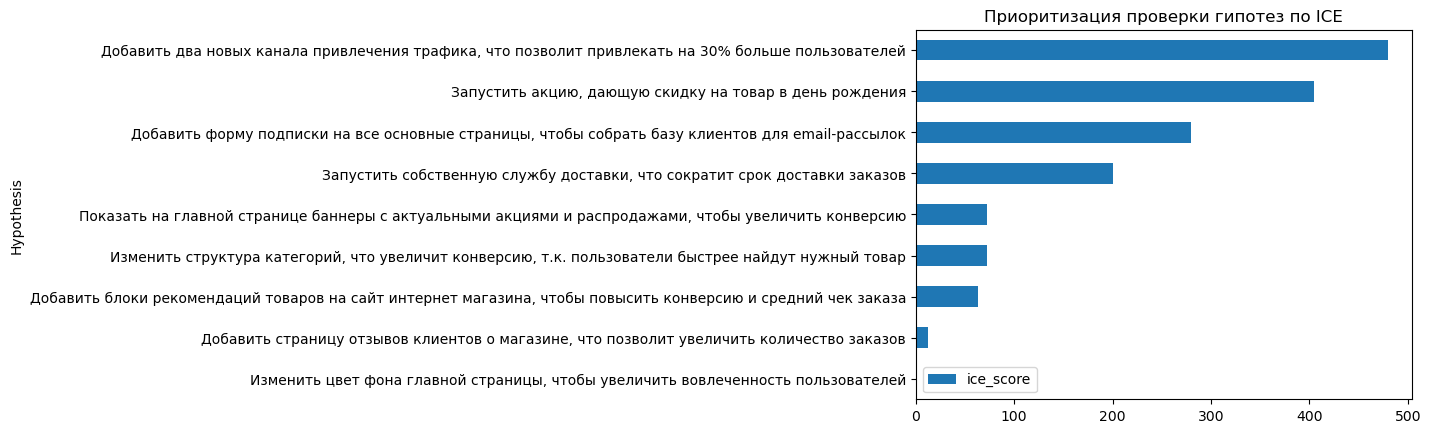

In [20]:
hypothesis.sort_values('ice_score').plot(y='ice_score', x='Hypothesis', kind='barh')
plt.title('Приоритизация проверки гипотез по ICE')

**По приоритизации фреймворком ICE к проверке отобраны гипотезы с индексами 0, 8, 7 и 1**

In [9]:
hypothesis['rice_score'] = round((hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts'], 2)

In [14]:
hypothesis.sort_values('rice_score', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ice_score,rice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,280,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,63,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,480,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,72,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,405,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,72,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,200,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,12,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1,3.0


Text(0.5, 1.0, 'Приоритизация проверки гипотез по RICE')

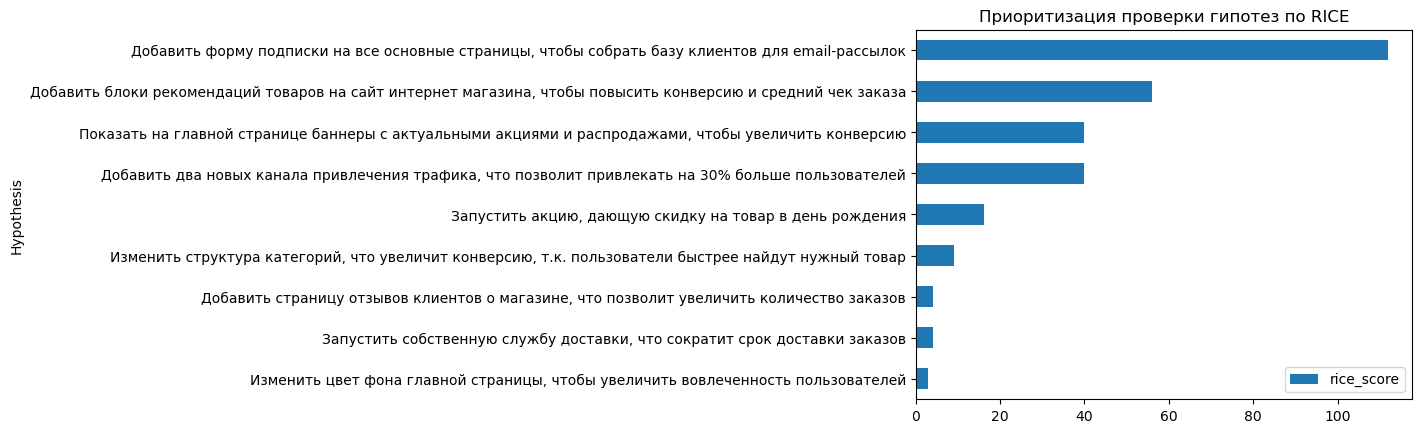

In [21]:
hypothesis.sort_values('rice_score').plot(y='rice_score', x='Hypothesis', kind='barh')
plt.title('Приоритизация проверки гипотез по RICE')

**С фреймворком RICE, учитывающим охват изменений, к проверке отобраны гипотезы № 7, 2, 0 и 6**

№| Приоритет гипотез по ICE  | Приоритет гипотез по RICE |
:-:|:-:|:-:|
1| 8 | 7 |
2| 0 | 2 |
3| 7 | 0 |
4| 6 | 6 |

**Вывод**

Если гипотезы 0, 7 и 6 оказались в обоих топ-4 гипотез по приоритету проверки как для ферймворка ICE, так и для RICE, то гипотезы 2 и 8 встречаются только единожды (причем с довольно высоким приоритетом). Это объясняется тем, что в данном случае для гипотезы №2 влияние оказывает более широкий охват пользователей.

<a name="stage_b"></a>
# Шаг 2. Анализ A/B-теста

<a name="stage_1"></a>
### Шаг 2.1. Кумулятивная выручка по группам

[Вернуться к оглавлению](#contents)

In [23]:
orders = pd.read_csv(r'C:\Users\Max_Berdnikov\Desktop\data\orders.csv')
visitors = pd.read_csv(r'C:\Users\Max_Berdnikov\Desktop\data\visitors.csv')

In [28]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [29]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [27]:
orders['date'] = pd.to_datetime(orders['date'])

In [30]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [31]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [32]:
visitors['date'] = pd.to_datetime(visitors['date'])

**Выполним агрегацию данных**

In [85]:
datesGroups = orders[['date', 'group']].drop_duplicates()

In [86]:
datesGroups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [87]:
ordersAggregated = datesGroups.apply(lambda x: orders[(orders['date'] <= x['date']) &
                                                       (orders['group'] == x['group'])].agg({'date' : 'max', 
                                                                                             'group' : 'max', 
                                                                                             'transactionId' : 'nunique', 
                                                                                             'visitorId' : 'nunique', 
                                                                                             'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [88]:
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [89]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[(visitors['date'] <= x['date']) & 
                                                          (visitors['group'] == x['group'])].agg({'date' : 'max', 
                                                                                                  'group' : 'max', 
                                                                                                  'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [100]:
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [91]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])

In [101]:
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [94]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

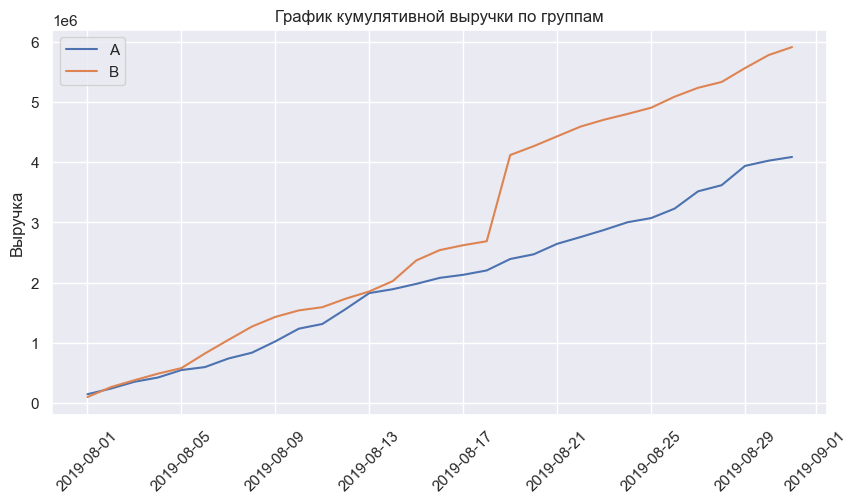

In [99]:
sns.set(rc={'figure.figsize':(10, 5)})
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title('График кумулятивной выручки по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=45);

**Вывод**

В целом наблюдается линейный рост у обоих графиков. Однако 18-19 числа у группы В был резкий скачок выручки, что исказило общую картину. Впоследствии сделаем проверку на выбросы

<a name="stage_2"></a>
### Шаг 2.2. Кумулятивный средний чек по группам

[Вернуться к оглавлению](#contents)

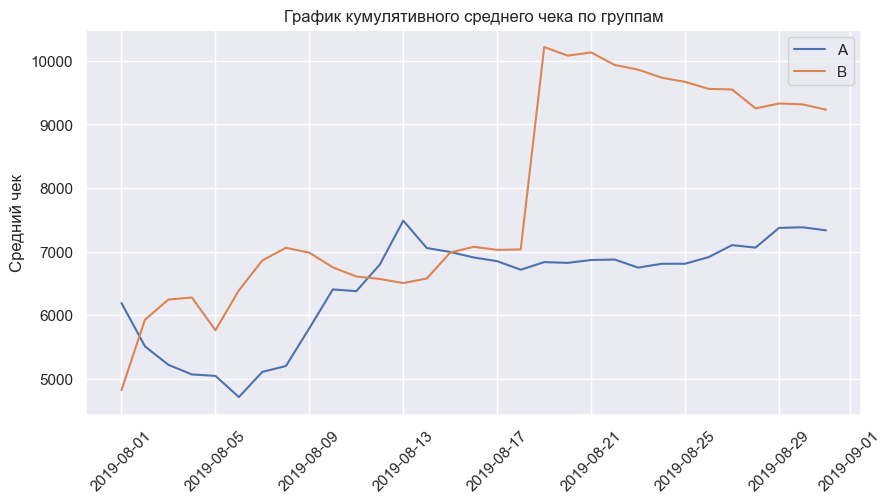

In [102]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel("Средний чек")
plt.xticks(rotation=45);

**Вывод**

После 13 числа кумулятивные значения среднего чека практически перестали колебаться. Здесь также виден выброс в группе В, который сильно завысил средний чек за 1 день

<a name="stage_3"></a>
### Шаг 2.3. Относительное изменение кумулятивного среднего чека группы B к группе A

[Вернуться к оглавлению](#contents)

In [103]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, on='date', how='left', suffixes=['_A', '_B'])

In [104]:
mergedCumulativeRevenue.head()

,date,revenue_A,orders_A,revenue_B,orders_B
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


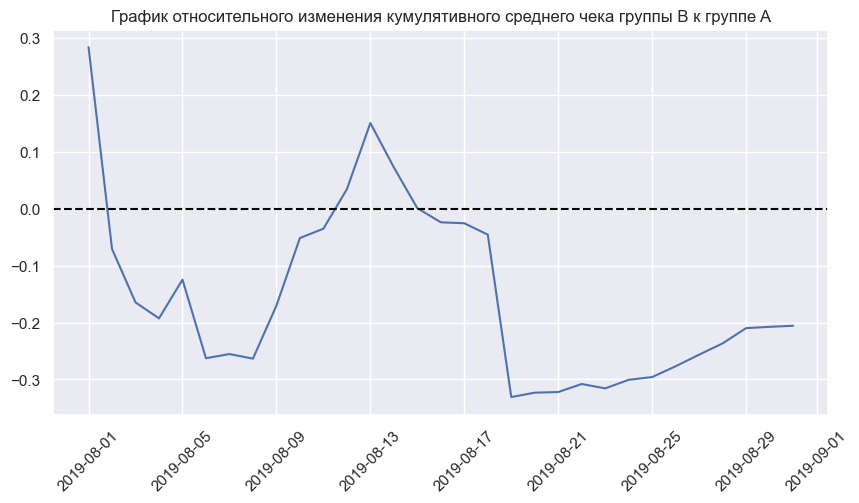

In [107]:
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenue_A'] / mergedCumulativeRevenue['orders_A']) / (mergedCumulativeRevenue['revenue_B'] / mergedCumulativeRevenue['orders_B']) - 1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=45);

**Вывод**

Результаты теста значительно и резко менялись в несколько дат Видимо, именно тогда были совершены аномальные заказы.

<a name="stage_4"></a>
### Шаг 2.4. Кумулятивная конверсия по группам

[Вернуться к оглавлению](#contents)

In [109]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856


In [110]:
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

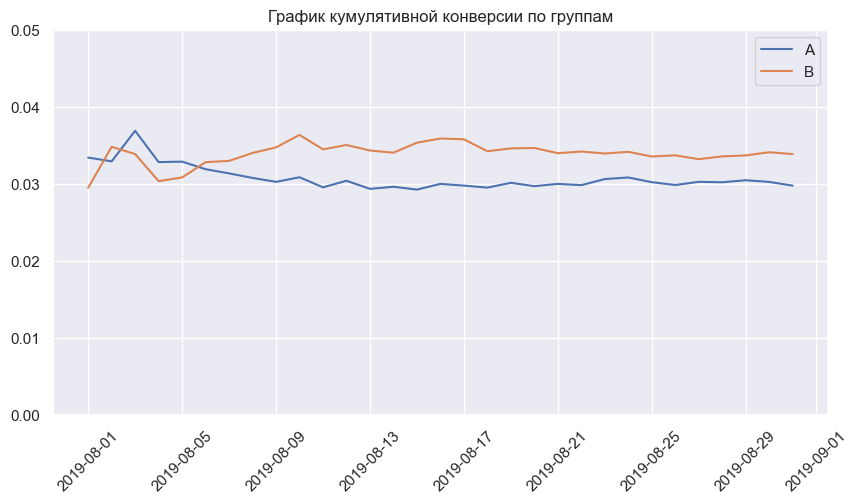

In [113]:
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.ylim(0, 0.05)
plt.title('График кумулятивной конверсии по группам')
plt.xticks(rotation=45);

**Вывод**

В начале теста сегмент А имел большую конверсию, но постепенно сегмент В выровнялся и зафиксировался примерно около одного значения, больше значения сегмента А.

<a name="stage_5"></a>
### Шаг 2.5. Относительное изменение кумулятивной конверсии группы B к группе A

[Вернуться к оглавлению](#contents)

In [114]:
mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(cumulativeDataB[['date', 'conversion']], on='date', how='left', suffixes=['_A', '_B'])

In [120]:
mergedCumulativeConversions.head()

,date,conversion_A,conversion_B
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


(-0.5, 0.5)

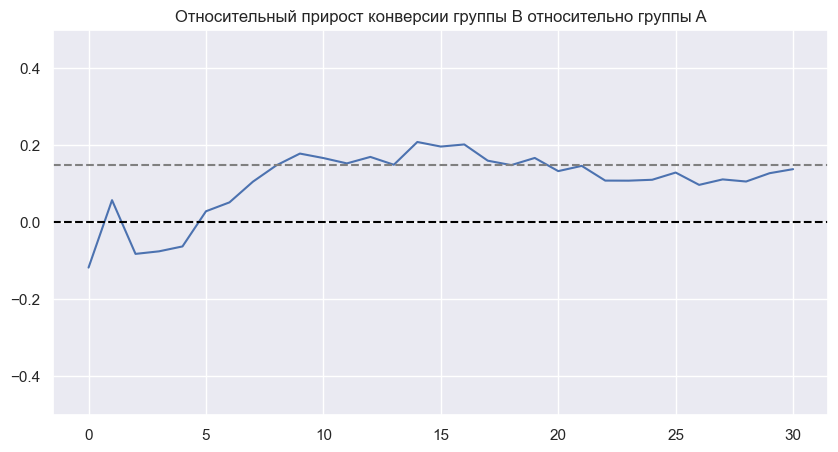

In [122]:
plt.plot(mergedCumulativeConversions['conversion_B'] / mergedCumulativeConversions['conversion_A'] - 1)
plt.title("Относительный прирост конверсии группы B относительно группы A")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.ylim(-0.5, 0.5)

**Вывод**

Почти с самого начала теста группа В лидирует по конверсии: становится лучше и лучше, либо зафиксировалась около прироста в 15% относительно группы А.

<a name="stage_6"></a>
### Шаг 2.6. Точечный график количества заказов по пользователям

[Вернуться к оглавлению](#contents)

In [125]:
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
ordersByUsers.columns = ['visitorId', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).head()

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


In [130]:
ordersByUsers['orders'].value_counts()

1     937
2      64
3      17
5       6
4       3
11      2
8       1
9       1
Name: orders, dtype: int64

Text(0, 0.5, 'Кол-во заказов')

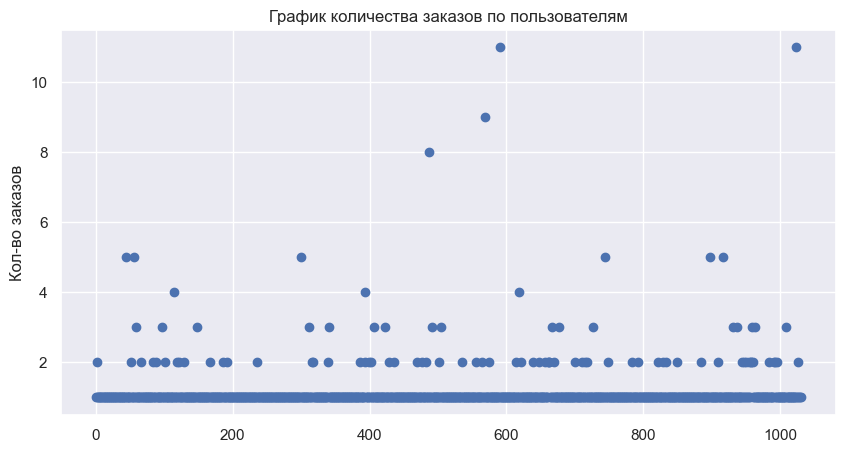

In [127]:
x_values = pd.Series(range(0, len(ordersByUsers['orders'])))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title("График количества заказов по пользователям")
plt.ylabel('Кол-во заказов')

**Вывод**

Преимущественно поьзователи совершили только 1 заказ. Гораздо реже 2 заказа. Присутствуют единичные выбросы

<a name="stage_7"></a>
### Шаг 2.7. Граница для определения аномальных пользователей

[Вернуться к оглавлению](#contents)

In [135]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 2., 4.])

**Вывод**

Не более 5% пользователей совершали больше двух заказов. И не более 1% пользователей — больше четырёх заказов. Выберем границей аномальных значений 99-ый перцентиль

<a name="stage_8"></a>
### Шаг 2.8. Точечный график стоимостей заказов

[Вернуться к оглавлению](#contents)

Text(0, 0.5, 'Стоимость заказа')

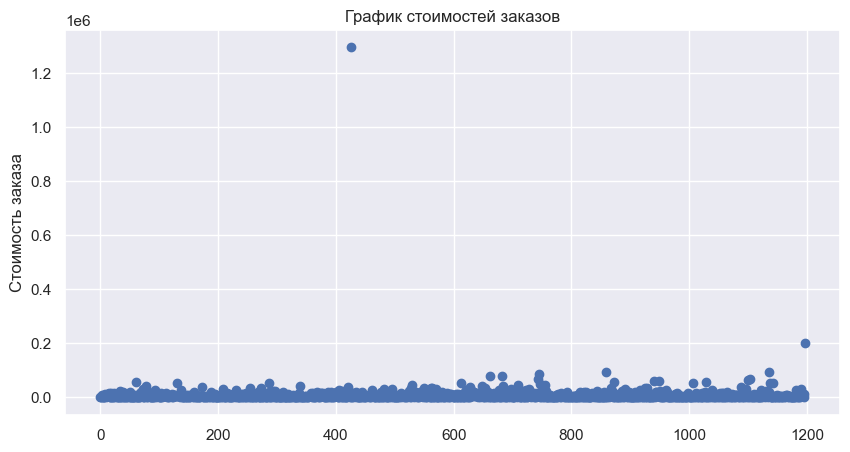

In [138]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title("График стоимостей заказов")
plt.ylabel('Стоимость заказа')

**Вывод**

На графике отчетливо видно 2 выброса: заказы стоимостью около 200 т.р. и 1.3 млн.руб. Именно они искривили предыдущие графики

<a name="stage_9"></a>
### Шаг 2.9. Граница для определения аномальных заказов

[Вернуться к оглавлению](#contents)

In [139]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

**Вывод**

Не более 5% заказов дороже 28000 руб. Не более 1% заказов дороже 58233 руб. Выберем границей аномальных значений 99-ый перцентиль

<a name="stage_10"></a>
### Шаг 2.10. Статистическая значимость различий в конверсии между группами по «сырым» данным

[Вернуться к оглавлению](#contents)

In [141]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

In [142]:
visitorsADaily.head()

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [143]:
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date': 'max', 
                                                                                                               'visitorsPerDateA': 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [144]:
visitorsACummulative.head()

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [145]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date': 'max', 
                                                                                                               'visitorsPerDateB': 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [148]:
ordersADaily = orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']].groupby('date', 
                                                                                               as_index=False).agg({'transactionId': 'nunique', 
                                                                                                                    'revenue': 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

In [149]:
ordersADaily.head()

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


In [150]:
ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg({'date': 'max', 
                                                                                                       'ordersPerDateA': 'sum', 
                                                                                                       'revenuePerDateA': 'sum'}), axis=1)
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

In [151]:
ordersACummulative.head()

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


In [152]:
ordersBDaily = orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']].groupby('date', 
                                                                                               as_index=False).agg({'transactionId': 'nunique', 
                                                                                                                    'revenue': 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [153]:
ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg({'date': 'max', 
                                                                                                       'ordersPerDateB': 'sum', 
                                                                                                       'revenuePerDateB': 'sum'}), axis=1)
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [154]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [155]:
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [158]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsersA.columns = ['userId', 'orders']

In [160]:
ordersByUsersA.head()

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [159]:
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsersB.columns = ['userId', 'orders'] 

In [161]:
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],
                    axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],
                    axis=0)

In [162]:
# По «сырым» данным определяем различия в конверсии групп A и B
print("{0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

# Выведем относительный прирост конверсии группы B
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.01679
0.138


In [163]:
# относительное различие конверсии группы B
print("{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

0.138


**Вывод**

P-value меньше 0.05, потому нулевую гипотезу отвергаем. Анализ «сырых данных» сообщает что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы В к конверсии группы А равен 13.8%.

<a name="stage_11"></a>
### Шаг 2.11. Статистическая значимость  различий в среднем чеке заказа между группами по «сырым» данным

[Вернуться к оглавлению](#contents)

In [164]:
# рассчитаем статистическую значимость различий в среднем чеке между сегментами
print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

# А ещё найдём относительные различия в среднем чеке между группами
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.729
0.259


**Вывод**

P-value больше 0.05 — статистически значимых отличий в среднем чеке между группами нет. Относительное различие среднего чека между сегментами всего 25.9%, что довольно много. Вероятно, это и есть влияние аномального заказа

<a name="stage_12"></a>
### Шаг 2.12. Статистическая значимость  различий в конверсии между группами по «очищенным» данным

[Вернуться к оглавлению](#contents)

In [166]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['userId'],
    ],
    axis=0,
)

In [168]:
usersWithExpensiveOrders = orders[orders['revenue'] > 58233]['visitorId']

In [169]:
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.shape) 

(31,)


In [179]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            ~ordersByUsersA['userId'].isin(abnormalUsers)
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [180]:
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            ~ordersByUsersB['userId'].isin(abnormalUsers)
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [181]:
print('{0:.5f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.01007
0.174


**Вывод**

Конверсия группы В снова превышает конверсию группы А со статистической значимостью. Относительный прирост конверсии группы В к конверсии группы А после очистки вырос до 17.4%.

<a name="stage_13"></a>
### Шаг 2.13. Статистическая значимость  различий в среднем чеке заказа между группами по «очищенным» данным

[Вернуться к оглавлению](#contents)

In [183]:
print(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                    (orders['group'] == 'A') &
                    (~orders['visitorId'].isin(abnormalUsers))
            ]['revenue'],
            orders[
                    (orders['group'] == 'B') &
                    (~orders['visitorId'].isin(abnormalUsers))
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
                (orders['group'] == 'B') &
                (~orders['visitorId'].isin(abnormalUsers))
        ]['revenue'].mean()
        / orders[
                (orders['group'] == 'A') &
                (~orders['visitorId'].isin(abnormalUsers))
        ]['revenue'].mean()
        - 1
    )
)

0.798
-0.020


**Вывод**

Не получилось отвергнуть нулевую гипотезу. Вывод о различии средних чеков сделать нельзя.

<a name="stage_14"></a>
### Шаг 2.14. Результаты теста

[Вернуться к оглавлению](#contents)

* В целом кумулятивные показатели за время проведения теста (1 месяц) перестали колебаться и приняли более линейный вид, что говорит о том, что мы избежали проблемы "подглядывания" и можем делать окончательные выводы. 
* Несмотря на то, что в группе В удалось повысить конверсию пользователей, средний чек между группами не имеет статистических различий. 
* Если конверсия являлась ключевым показателем при формулировании гипотезы, то тест можно завершать, а нововведения группы В признать успешными.